In [1]:
from numpy import *
import operator

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [2]:
import pandas as pd
data = pd.read_excel('missing_data.xls',header=None) # 从ercel读取了数据
# 注意到里面有一些数据位置显示为NaN 表示缺少数据
data.describe()

,0,1,2
count,19.000000,17.000000,17.000000
mean,236.262626,363.666265,553.901624
std,1.225465,57.600529,67.707729
min,234.468800,206.434900,435.350800
25%,235.494800,328.089700,514.890000
50%,235.906300,388.023000,538.347000
75%,237.192750,401.623400,611.340800
max,238.656300,416.879500,660.234700


In [3]:
# 处理数据插值
from scipy.interpolate import lagrange
def ployinterp_column(s,n,k=5):
    y = s[list(range(max(n-k,0),n)) + list(range(n+1,min(len(s),n+1+k)))]
    y = y[y.notnull()]
    return lagrange(y.index, list(y))(n)

#逐个元素判断是否需要插值
for i in data.columns:
  for j in range(len(data)):
    if (data[i].isnull())[j]: #如果为空即插值。
      data[i][j] = ployinterp_column(data[i], j)

In [4]:
outputfile = "result_data.xls" #结果保存路径
data.to_excel(outputfile, header=None, index=False) #输出结果

In [5]:
# 准备训练数据和测试数据
from random import shuffle
data = pd.read_excel('model.xls')
data = data.iloc[:,:].values
shuffle(data)
p =0.8
train = data[:int(len(data)*p)]
test = data[int(len(data)*p):,:]

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# 决策数模型
treefile = 'D:\py_workspace\kNN\model'
tree = DecisionTreeClassifier()
tree.fit(train[:,:3],train[:,3])
joblib.dump(tree,treefile) # 保存模型

D:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D:\\py_workspace\\kNN\\model']

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

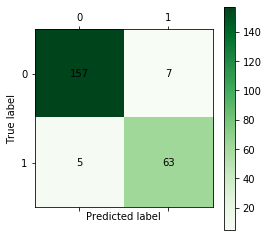

In [7]:
def cm_plot(y, yp): # 定义混淆矩阵绘制函数
  from sklearn.metrics import confusion_matrix #导入混淆矩阵函数

  cm = confusion_matrix(y, yp) #混淆矩阵
  plt.matshow(cm, cmap=plt.cm.Greens) 
  plt.colorbar() #颜色标签

  for x in range(len(cm)): #数据标签
    for y in range(len(cm)):
      plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')

  plt.ylabel('True label') #坐标轴标签
  plt.xlabel('Predicted label') #坐标轴标签
  return plt

cm_plot(train[:,3],tree.predict(train[:,:3]))

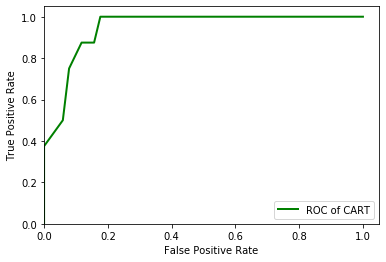

In [8]:
fpr, tpr, thresholds = roc_curve(test[:,3], tree.predict_proba(test[:,:3])[:,1],  pos_label=1)
plt.plot(fpr, tpr, linewidth=2, label = 'ROC of CART', color = 'green') #作出 ROC 曲线 
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc=4) #图例
plt.show() #显示作图结果有

In [9]:
from keras.models import Sequential  #导入神经网络初始化函数 
from keras.layers.core import Dense,Activation #导入神经网络层函数、激活函

netfile = "net_weight.keras"
net = Sequential()
net.add(Dense(input_dim = 3, output_dim = 10)) #添加输入层（3节点）到隐藏层（10节点）
net.add(Activation('relu'))
net.add(Dense(input_dim = 10, output_dim = 1)) #添加隐藏层（10节点）到输出层（1节点）
net.add(Activation('sigmoid'))
net.compile(loss = 'binary_crossentropy', optimizer = 'adam') #编译模型 用adam方法

net.fit(train[:,:3], train[:,3], nb_epoch=1000, batch_size=1) #训练模型，循环1000次

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=3, units=10)`
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, units=1)`
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':



Epoch 1/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.8781
Epoch 2/1000
232/232 [==============================] - 0s 782us/step - loss: 0.6951
Epoch 3/1000
232/232 [==============================] - 0s 739us/step - loss: 0.6422
Epoch 4/1000
232/232 [==============================] - 0s 855us/step - loss: 0.6131
Epoch 5/1000
232/232 [==============================] - 0s 845us/step - loss: 0.5871
Epoch 6/1000
232/232 [==============================] - 0s 875us/step - loss: 0.5632
Epoch 7/1000
232/232 [==============================] - 0s 868us/step - loss: 0.5392
Epoch 8/1000
232/232 [==============================] - 0s 980us/step - loss: 0.5101
Epoch 9/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.4859
Epoch 10/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.4628
Epoch 11/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.4432
Epoch 12/1000
232/232 [==============================] - 0s 1ms/step -

232/232 [==============================] - 0s 834us/step - loss: 0.2186
Epoch 95/1000
232/232 [==============================] - 0s 782us/step - loss: 0.2165
Epoch 96/1000
232/232 [==============================] - 0s 783us/step - loss: 0.2159
Epoch 97/1000
232/232 [==============================] - 0s 759us/step - loss: 0.2181
Epoch 98/1000
232/232 [==============================] - 0s 881us/step - loss: 0.2155
Epoch 99/1000
232/232 [==============================] - 0s 843us/step - loss: 0.2157
Epoch 100/1000
232/232 [==============================] - 0s 825us/step - loss: 0.2154
Epoch 101/1000
232/232 [==============================] - 0s 818us/step - loss: 0.2146
Epoch 102/1000
232/232 [==============================] - 0s 873us/step - loss: 0.2134
Epoch 103/1000
232/232 [==============================] - 0s 782us/step - loss: 0.2137
Epoch 104/1000
232/232 [==============================] - 0s 779us/step - loss: 0.2160
Epoch 105/1000
232/232 [==============================] - 0s 75

232/232 [==============================] - 0s 920us/step - loss: 0.2014
Epoch 189/1000
232/232 [==============================] - 0s 946us/step - loss: 0.2015
Epoch 190/1000
232/232 [==============================] - 0s 830us/step - loss: 0.2009
Epoch 191/1000
232/232 [==============================] - 0s 877us/step - loss: 0.2018
Epoch 192/1000
232/232 [==============================] - 0s 903us/step - loss: 0.2006
Epoch 193/1000
232/232 [==============================] - 0s 843us/step - loss: 0.2032
Epoch 194/1000
232/232 [==============================] - 0s 843us/step - loss: 0.2017
Epoch 195/1000
232/232 [==============================] - 0s 916us/step - loss: 0.2015
Epoch 196/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2012
Epoch 197/1000
232/232 [==============================] - 0s 859us/step - loss: 0.2023
Epoch 198/1000
232/232 [==============================] - 0s 843us/step - loss: 0.1998
Epoch 199/1000
232/232 [==============================] - 0s

232/232 [==============================] - 0s 901us/step - loss: 0.1950
Epoch 283/1000
232/232 [==============================] - 0s 877us/step - loss: 0.1962
Epoch 284/1000
232/232 [==============================] - 0s 877us/step - loss: 0.1961
Epoch 285/1000
232/232 [==============================] - 0s 828us/step - loss: 0.1982
Epoch 286/1000
232/232 [==============================] - 0s 907us/step - loss: 0.1963
Epoch 287/1000
232/232 [==============================] - 0s 877us/step - loss: 0.1973
Epoch 288/1000
232/232 [==============================] - 0s 860us/step - loss: 0.1949
Epoch 289/1000
232/232 [==============================] - 0s 847us/step - loss: 0.1938
Epoch 290/1000
232/232 [==============================] - 0s 877us/step - loss: 0.1958
Epoch 291/1000
232/232 [==============================] - 0s 871us/step - loss: 0.1980
Epoch 292/1000
232/232 [==============================] - 0s 836us/step - loss: 0.1952
Epoch 293/1000
232/232 [==============================] - 

232/232 [==============================] - 0s 752us/step - loss: 0.1828 0s - loss: 0.16
Epoch 377/1000
232/232 [==============================] - 0s 760us/step - loss: 0.1833
Epoch 378/1000
232/232 [==============================] - 0s 748us/step - loss: 0.1843
Epoch 379/1000
232/232 [==============================] - 0s 735us/step - loss: 0.1848
Epoch 380/1000
232/232 [==============================] - ETA: 0s - loss: 0.172 - 0s 727us/step - loss: 0.1819
Epoch 381/1000
232/232 [==============================] - 0s 737us/step - loss: 0.1852
Epoch 382/1000
232/232 [==============================] - 0s 739us/step - loss: 0.1852
Epoch 383/1000
232/232 [==============================] - 0s 752us/step - loss: 0.1837
Epoch 384/1000
232/232 [==============================] - 0s 727us/step - loss: 0.1837
Epoch 385/1000
232/232 [==============================] - 0s 774us/step - loss: 0.1812
Epoch 386/1000
232/232 [==============================] - 0s 725us/step - loss: 0.1836
Epoch 387/1000
232

232/232 [==============================] - 0s 795us/step - loss: 0.1799
Epoch 470/1000
232/232 [==============================] - 0s 808us/step - loss: 0.1783
Epoch 471/1000
232/232 [==============================] - 0s 767us/step - loss: 0.1788
Epoch 472/1000
232/232 [==============================] - 0s 857us/step - loss: 0.1796
Epoch 473/1000
232/232 [==============================] - 0s 781us/step - loss: 0.1799
Epoch 474/1000
232/232 [==============================] - 0s 787us/step - loss: 0.1777
Epoch 475/1000
232/232 [==============================] - 0s 812us/step - loss: 0.1782
Epoch 476/1000
232/232 [==============================] - 0s 778us/step - loss: 0.1824
Epoch 477/1000
232/232 [==============================] - 0s 782us/step - loss: 0.1772
Epoch 478/1000
232/232 [==============================] - 0s 808us/step - loss: 0.1767
Epoch 479/1000
232/232 [==============================] - 0s 787us/step - loss: 0.1823
Epoch 480/1000
232/232 [==============================] - 

232/232 [==============================] - 0s 790us/step - loss: 0.1768
Epoch 563/1000
232/232 [==============================] - 0s 782us/step - loss: 0.1740
Epoch 564/1000
232/232 [==============================] - 0s 787us/step - loss: 0.1802
Epoch 565/1000
232/232 [==============================] - 0s 769us/step - loss: 0.1761
Epoch 566/1000
232/232 [==============================] - 0s 795us/step - loss: 0.1792
Epoch 567/1000
232/232 [==============================] - 0s 817us/step - loss: 0.1779
Epoch 568/1000
232/232 [==============================] - 0s 784us/step - loss: 0.1789
Epoch 569/1000
232/232 [==============================] - 0s 778us/step - loss: 0.1737
Epoch 570/1000
232/232 [==============================] - 0s 781us/step - loss: 0.1795
Epoch 571/1000
232/232 [==============================] - 0s 810us/step - loss: 0.1779
Epoch 572/1000
232/232 [==============================] - 0s 898us/step - loss: 0.1770
Epoch 573/1000
232/232 [==============================] - 

232/232 [==============================] - 0s 731us/step - loss: 0.1753
Epoch 657/1000
232/232 [==============================] - 0s 761us/step - loss: 0.1787
Epoch 658/1000
232/232 [==============================] - 0s 876us/step - loss: 0.1774
Epoch 659/1000
232/232 [==============================] - 0s 725us/step - loss: 0.1767
Epoch 660/1000
232/232 [==============================] - 0s 712us/step - loss: 0.1750
Epoch 661/1000
232/232 [==============================] - 0s 701us/step - loss: 0.1765
Epoch 662/1000
232/232 [==============================] - 0s 719us/step - loss: 0.1776
Epoch 663/1000
232/232 [==============================] - 0s 714us/step - loss: 0.1782
Epoch 664/1000
232/232 [==============================] - 0s 873us/step - loss: 0.1775
Epoch 665/1000
232/232 [==============================] - 0s 993us/step - loss: 0.1751
Epoch 666/1000
232/232 [==============================] - 0s 765us/step - loss: 0.1782
Epoch 667/1000
232/232 [==============================] - 

232/232 [==============================] - 0s 821us/step - loss: 0.1769
Epoch 751/1000
232/232 [==============================] - 0s 821us/step - loss: 0.1758
Epoch 752/1000
232/232 [==============================] - 0s 794us/step - loss: 0.1753
Epoch 753/1000
232/232 [==============================] - 0s 752us/step - loss: 0.1759
Epoch 754/1000
232/232 [==============================] - 0s 772us/step - loss: 0.1765
Epoch 755/1000
232/232 [==============================] - 0s 989us/step - loss: 0.1745 0s - loss: 0.
Epoch 756/1000
232/232 [==============================] - 0s 752us/step - loss: 0.1777
Epoch 757/1000
232/232 [==============================] - 0s 804us/step - loss: 0.1744
Epoch 758/1000
232/232 [==============================] - 0s 808us/step - loss: 0.1752
Epoch 759/1000
232/232 [==============================] - 0s 804us/step - loss: 0.1756
Epoch 760/1000
232/232 [==============================] - 0s 812us/step - loss: 0.1756
Epoch 761/1000
232/232 [====================

232/232 [==============================] - 0s 804us/step - loss: 0.1745
Epoch 844/1000
232/232 [==============================] - 0s 774us/step - loss: 0.1752
Epoch 845/1000
232/232 [==============================] - 0s 795us/step - loss: 0.1770
Epoch 846/1000
232/232 [==============================] - 0s 761us/step - loss: 0.1766
Epoch 847/1000
232/232 [==============================] - 0s 752us/step - loss: 0.1768
Epoch 848/1000
232/232 [==============================] - 0s 791us/step - loss: 0.1759
Epoch 849/1000
232/232 [==============================] - 0s 800us/step - loss: 0.1743
Epoch 850/1000
232/232 [==============================] - 0s 808us/step - loss: 0.1758
Epoch 851/1000
232/232 [==============================] - 0s 769us/step - loss: 0.1770
Epoch 852/1000
232/232 [==============================] - 0s 787us/step - loss: 0.1739
Epoch 853/1000
232/232 [==============================] - 0s 763us/step - loss: 0.1755
Epoch 854/1000
232/232 [==============================] - 

232/232 [==============================] - 0s 787us/step - loss: 0.1772
Epoch 937/1000
232/232 [==============================] - 0s 761us/step - loss: 0.1751
Epoch 938/1000
232/232 [==============================] - 0s 886us/step - loss: 0.1761
Epoch 939/1000
232/232 [==============================] - 0s 790us/step - loss: 0.1770
Epoch 940/1000
232/232 [==============================] - 0s 808us/step - loss: 0.1765
Epoch 941/1000
232/232 [==============================] - 0s 791us/step - loss: 0.1763
Epoch 942/1000
232/232 [==============================] - 0s 778us/step - loss: 0.1752
Epoch 943/1000
232/232 [==============================] - 0s 795us/step - loss: 0.1758
Epoch 944/1000
232/232 [==============================] - 0s 815us/step - loss: 0.1748
Epoch 945/1000
232/232 [==============================] - 0s 787us/step - loss: 0.1763
Epoch 946/1000
232/232 [==============================] - 0s 845us/step - loss: 0.1747
Epoch 947/1000
232/232 [==============================] - 

In [10]:
netfile = "net_weight.keras"
net.save_weights(netfile) #保存模型
# net.save_weights('m1.h5')
net.save('net.keras') # 保存模型

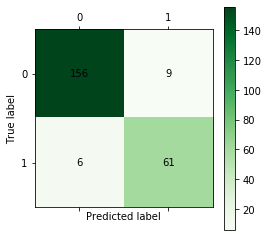

In [11]:
# 对模型进行评估
# 1 混淆矩阵
predict_result = net.predict_classes(train[:,:3]).reshape(len(train)) # 预测结果保存 用于绘制混淆矩阵
cm_plot(train[:,3], predict_result).show() # 可视化

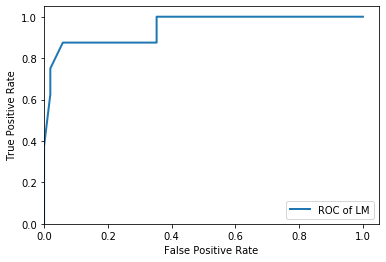

In [12]:
# 2 绘制ROC曲线
predict_result = net.predict(test[:,:3]).reshape(len(test))
fpr, tpr, thresholds = roc_curve(test[:,3], predict_result, pos_label=1)
plt.plot(fpr, tpr, linewidth=2, label = 'ROC of LM') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc=4) #图例
plt.show() #显示作图结果

In [13]:
# 参考资料：https://zhuanlan.zhihu.com/p/33901836